# Install dependencies

In [2]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import copy
import pickle
import matplotlib.pyplot as plt
import ase.io

# define current directory (Google Drive for Colab or local computer)
try:
  import google.colab
  IN_COLAB = True
  base_dir = '/content/drive/MyDrive/'
except:
  IN_COLAB = False
  PATH = 'path_in_your_local_system'

# Reading raw trajectory files

Each trajectory file includes the each structure-energy data pair during structure relaxation for each material.

First, download the trajectory files from the [OCP github page](https://github.com/Open-Catalyst-Project/ocp/blob/main/DATASET.md#relaxation-trajectories-1).

In [27]:
# load only one trajectory file to see the structure of each file
traj_data = ase.io.read("path_to_trajectory_files/oc22_trajectories/trajectories/oc22/raw_trajs/1001022_Al2-WO4-3_mvc-14989_clean_DAf9CVLas7.traj", ":")
len(traj_data)

65

In [28]:
# get the energy of the relaxed structure (the lowest energy) for this material
min([t.get_total_energy() for t in traj_data])

-780.91420454

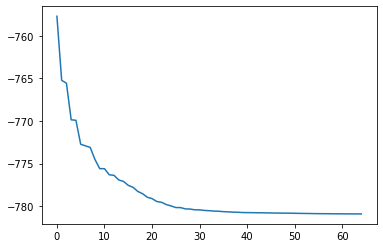

In [30]:
# this is convergence plot during the relaxation (number of configurations vs. total energy)
plt.plot([t.get_total_energy() for t in traj_data])

In [20]:
from os import listdir
from os.path import isfile, join
traj_path = 'path_to_trajectory_folder/oc22_trajectories/trajectories/oc22/raw_trajs/'
traj_files = [f for f in listdir(traj_path) if isfile(join(traj_path, f))]
print('Number of trajectory files: %d ' % len(traj_files))

In [ ]:
# This loop gets the energy of the relaxed configuration (the lowest energy among the all trajectories)
# with infomration about the material

data_ocp = {'bulk_id':[],'traj_id':[],'bulk_symbols':[],'energy':[]}
counter=0
for file in tqdm(traj_files):
  traj_data = ase.io.read(traj_path+file, ":")
  file_name_parts = file.split("_")
  data_ocp['bulk_id'].append(file_name_parts[-3])
  data_ocp['traj_id'].append(file.split('.')[0])
  energy_relaxed = min([t.get_total_energy() for t in traj_data])
  data_ocp['energy'].append(energy_relaxed)
  data_ocp['bulk_symbols'].append(traj_data[0].get_chemical_formula())
  counter+=1

  if counter%500==0: # at every 500 datapoints, the data is saved just in case
    data_ocp_df = pd.DataFrame.from_dict(data_ocp)
    data_ocp_df.to_csv('path_to_save/data_ocp.csv')

In [7]:
data_ocp_df

,energy,bulk_id,bulk_symbols,traj_id
0,-395.685558,mp-1176502,Lu8Nb8O30,B2Lu6hTUhS_HaZAnhMI1C
1,-275.918556,MnAuO4-rutile,C2Au8Mn7O32,TpUMdSCD52_a5ZrmBECYq
2,-523.016870,mp-34022,Mg24O50Sn14,WeOHaSFskx_EfxIYvbRDp
3,-144.747154,mp-755322,HBa4Na24O12,nB20Qp8Xa6_v0xJvQrXHw
4,-352.393527,mp-996954,Cu18O32Pt18,clean_ZVQWxJ6hLF
...,...,...,...,...
55995,-88.787472,mp-997001,Ag8Hg8O13,XPzywgRZ8a_YQtDnvq3Tl
55996,-504.712929,mp-1101375,O34Sc12Ti12,E5fIVDKHK8_vX15ubQ1XR
55997,-569.881482,mp-8922,Cd11N2O70Sb22,cGUaLIyf89_SQasxN9gBW
55998,-584.350815,mp-768483,H4Lu12O52Sb20,JuLGjxkdum_yreXui62Qa


# Reading mapping file

Mapping file has the information about the material regarding bulk_id, which corresponds to material_id in Materials Project, slab_sid representing a single slab+adsorbate system, number and type of adsorbate, tajectory file name, miller index of the surface an so on.

Here, trajectory file name ("traj_id") is important to match the information in this file with information in the trajectory files.

First, download the mapping file from the [OCP github page](https://github.com/Open-Catalyst-Project/ocp/blob/main/DATASET.md#oc22-mappings).

In [8]:
with open(PATH+'oc22_metadata.pkl','rb') as f:
  data_mapping = pd.DataFrame(pickle.load(f))
data_mapping = data_mapping.T
data_mapping

,bulk_id,miller_index,nads,traj_id,bulk_symbols,slab_sid,ads_symbols
14892,mp-10390,"(2, 2, -1)",1,Ta2O5_mp-10390_Ckjw95OuOa_xlcyfgkuFa,Ta8O20,14089,HO2
6627,mp-505365,"(0, 0, 1)",1,Mg3Nb6O11_mp-505365_irYkJvcoQ8_jMyG5G2tlJ,Mg3Nb6O11,5790,H2O
75924,mp-674298,"(0, 1, 0)",1,Al22CdO34_mp-674298_u9MYbadfCN_nNUUW73Lie,Al44Cd2O68,71646,C
29818,mp-28403,"(2, 1, 0)",0,NaN,Ba8W4O20,NaN,NaN
6077,mp-684697,"(1, 0, 0)",0,Sc20O19_mp-684697_clean_nZSg3yaZgm,Sc40O38,NaN,NaN
...,...,...,...,...,...,...,...
77371,mvc-8096,"(1, 0, 0)",1,Ge2BiO6_mvc-8096_r7NPuu63aD_MCy1v0eB1s,Ge8Bi4O24,78006,C
80112,mp-801028,"(1, 0, 0)",0,Ba4Sb2O9_mp-801028_clean_cqJfep8oEL,Ba8Sb4O18,NaN,NaN
85714,mp-850283,"(0, 1, 0)",0,NaN,Hf4Nb4O16,NaN,NaN
77897,mp-33857,"(2, 0, 1)",10,CrSbO4_mp-33857_UUZHXt5fvl_NS0W3OqbR5,Cr2Sb2O8,76178,C


# Adsorption energy calculation

Adsorption energy of a surface is calculated by using the formula below:

$$ E_{adsorption} = E_{slab+adsorbate} - E_{slab} - E_{adsorbate}$$

In this formula, $E_{adsorption}$ is the adsorption energy, $E_{slab+adsorbate}$ is the energy of the system with the adsorbate on the surface of the slab, $E_{slab}$ is the energy of the slab only (no adsorbate on it!) and $E_{adsorbate}$ is the energy of the adsorbate (i.e. O, OH, $\mathrm{CO_2}$ or so).


For instance, for the oxygen reduction reaction, we should first filter the mapping dataframe to get the information about the slabs on which theadsorption energies of OH, OOH and O are calculated.

Then, we get the energies from the trajectory files dataframe.

In [9]:
# OH
data_mapping_oh = data_mapping[data_mapping['ads_symbols']=='OH']
# further filter based on facet
# data_mapping_oh = data_mapping_oh[data_mapping_oh['miller_index']==(1,1,1)]
data_mapping_oh

,bulk_id,miller_index,nads,traj_id,bulk_symbols,slab_sid,ads_symbols
947,mp-29188,"(0, 1, 0)",1,VHgO3_mp-29188_eS5A4Pipah_XfbtyUJWys,V2Hg2O6,10609,OH
72980,mp-28158,"(1, 0, 0)",1,NaN,K16Be12O20,80964,OH
74662,mp-3520,"(1, 1, 0)",1,Y2SiO5_mp-3520_gC8ROBcQAd_HaRH6dyob9,Y16Si8O40,74826,OH
73269,mp-766877,"(1, 0, 2)",1,Si6Bi9O26_mp-766877_xumx4Ka8XC_2RFQxOoNH0,Si6Bi9O26,None,OH
33116,mp-3376,"(0, 0, 1)",4,Sr2SnO4_mp-3376_0J0J4VEndf_juSdWPoOUe,Sr4Sn2O8,31710,OH
...,...,...,...,...,...,...,...
73710,mp-1181502,"(2, 1, 0)",8,CsO2_mp-1181502_dNks6tS84N_1Z8jisZcbC,Cs2O4,73174,OH
18875,mp-31488,"(1, 0, 0)",1,Li3NbO4_mp-31488_fOAW4BDuBe_eDruihlXo1,Li24Nb8O32,80308,OH
21031,mp-849263,"(1, 0, 0)",4,NaV10O15_mp-849263_t1GRi7aUtn_N8qbcKVSiK,Na4V40O60,29803,OH
71164,mp-698842,"(0, 0, 1)",1,Li19Ni23O42_mp-698842_n5J7aeTtNa_j0g5m63CFt,Li19Ni23O42,80476,OH


In [11]:
# get OH adsorption energies
dt_energies = {'index':[],'energy':[]}
for i,id in tqdm(enumerate(data_mapping_oh['bulk_id']) ):
  try:
    traj_last_three = data_mapping_oh['traj_id'].iloc[i][-3:]
    datapoint = data_ocp_df[data_ocp_df['bulk_id']==id]
    datapoint = datapoint[datapoint['traj_id'].str.contains(traj_last_three)]
    dt_energies['energy'].append( datapoint['energy'].item() )
    dt_energies['index'].append(i)
  except:
    pass

data_oh = data_mapping_oh.iloc[dt_energies['index']]
data_oh['EOH*'] = dt_energies['energy']
data_oh

/tmp/ipykernel_15387/867908014.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_oh['EOH*'] = dt_energies['energy']


,bulk_id,miller_index,nads,traj_id,bulk_symbols,slab_sid,ads_symbols,EOH*
947,mp-29188,"(0, 1, 0)",1,VHgO3_mp-29188_eS5A4Pipah_XfbtyUJWys,V2Hg2O6,10609,OH,-112.825323
74662,mp-3520,"(1, 1, 0)",1,Y2SiO5_mp-3520_gC8ROBcQAd_HaRH6dyob9,Y16Si8O40,74826,OH,-608.070865
73269,mp-766877,"(1, 0, 2)",1,Si6Bi9O26_mp-766877_xumx4Ka8XC_2RFQxOoNH0,Si6Bi9O26,None,OH,-883.738935
33116,mp-3376,"(0, 0, 1)",4,Sr2SnO4_mp-3376_0J0J4VEndf_juSdWPoOUe,Sr4Sn2O8,31710,OH,-370.281499
32170,mp-754164,"(1, 0, 0)",2,Tl6WO12_mp-754164_GZWiWb3Okd_VI6gIBKD6M,Tl18W3O36,79695,OH,-543.943836
...,...,...,...,...,...,...,...,...
73710,mp-1181502,"(2, 1, 0)",8,CsO2_mp-1181502_dNks6tS84N_1Z8jisZcbC,Cs2O4,73174,OH,-376.151111
18875,mp-31488,"(1, 0, 0)",1,Li3NbO4_mp-31488_fOAW4BDuBe_eDruihlXo1,Li24Nb8O32,80308,OH,-767.373290
21031,mp-849263,"(1, 0, 0)",4,NaV10O15_mp-849263_t1GRi7aUtn_N8qbcKVSiK,Na4V40O60,29803,OH,-825.162816
71164,mp-698842,"(0, 0, 1)",1,Li19Ni23O42_mp-698842_n5J7aeTtNa_j0g5m63CFt,Li19Ni23O42,80476,OH,-523.177210


In [12]:
# O
data_mapping_o = data_mapping[data_mapping['ads_symbols']=='O']
# further filter based on facet
# data_mapping_o = data_mapping_o[data_mapping_o['miller_index']==(1,1,1)]
data_mapping_o

,bulk_id,miller_index,nads,traj_id,bulk_symbols,slab_sid,ads_symbols
32965,mp-7048,"(2, 2, 1)",2,Al2O3_mp-7048_lz7iCj87kU_Qay03BIa2l,Al8O12,11261,O
5624,mp-1103519,"(0, 0, 1)",2,KCuO_mp-1103519_W9K6s7spPr_7t5EFPFn25,K8Cu8O8,238,O
42464,TiMoO4-rutile,"(1, 0, 0)",1,90423983534_TiMoO4_TiMoO4-rutile_ZZmnAxJniM_2V...,Ti1Mo1O4,43268,O
21780,mp-755471,"(0, 1, 0)",3,LuCrO3_mp-755471_UVWEIaBY7X_IznwYYHn61,Lu4Cr4O12,8339,O
5331,mp-1221361,"(1, 0, 0)",4,Mn5SnO8_mp-1221361_bWoqVFaDsI_iOTw6bZyKz,Mn10Sn2O16,22294,O
...,...,...,...,...,...,...,...
11271,mp-558748,"(1, 1, 0)",2,Sc2O3_mp-558748_avL0LW5vhM_uENpqYD7xC,Sc12O18,21469,O
72667,mp-1193763,"(1, -2, 2)",2,Cu3Mo2O9_mp-1193763_VKbmzpwGO3_iAC8BwlPZ6,Cu6Mo4O18,None,O
8547,mp-27559,"(0, 0, 1)",2,Na14Cd2O9_mp-27559_AJwGDMgUuK_JhbtIwZJKX,Na14Cd2O9,80772,O
11523,mp-705564,"(0, 0, 1)",2,Co23O32_mp-705564_fz0ytztIMU_i4zEUdVbZI,Co23O32,40722,O


In [13]:
# get O adsorption energies
dt_energies = {'index':[],'energy':[]}
for i,id in tqdm(enumerate(data_mapping_o['bulk_id']) ):
  try:
    traj_last_three = data_mapping_o['traj_id'].iloc[i][-3:]
    datapoint = data_ocp_df[data_ocp_df['bulk_id']==id]
    datapoint = datapoint[datapoint['traj_id'].str.contains(traj_last_three)]
    dt_energies['energy'].append( datapoint['energy'].item() )
    dt_energies['index'].append(i)
  except:
    pass

data_o = data_mapping_o.iloc[dt_energies['index']]
data_o['EO*'] = dt_energies['energy']
data_o

10816it [00:38, 280.90it/s]
/tmp/ipykernel_15387/3670433687.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_o['EO*'] = dt_energies['energy']


,bulk_id,miller_index,nads,traj_id,bulk_symbols,slab_sid,ads_symbols,EO*
32965,mp-7048,"(2, 2, 1)",2,Al2O3_mp-7048_lz7iCj87kU_Qay03BIa2l,Al8O12,11261,O,-552.739073
5624,mp-1103519,"(0, 0, 1)",2,KCuO_mp-1103519_W9K6s7spPr_7t5EFPFn25,K8Cu8O8,238,O,-147.709122
42464,TiMoO4-rutile,"(1, 0, 0)",1,90423983534_TiMoO4_TiMoO4-rutile_ZZmnAxJniM_2V...,Ti1Mo1O4,43268,O,-611.258400
21780,mp-755471,"(0, 1, 0)",3,LuCrO3_mp-755471_UVWEIaBY7X_IznwYYHn61,Lu4Cr4O12,8339,O,-618.502114
5331,mp-1221361,"(1, 0, 0)",4,Mn5SnO8_mp-1221361_bWoqVFaDsI_iOTw6bZyKz,Mn10Sn2O16,22294,O,-410.859213
...,...,...,...,...,...,...,...,...
11271,mp-558748,"(1, 1, 0)",2,Sc2O3_mp-558748_avL0LW5vhM_uENpqYD7xC,Sc12O18,21469,O,-484.867448
72667,mp-1193763,"(1, -2, 2)",2,Cu3Mo2O9_mp-1193763_VKbmzpwGO3_iAC8BwlPZ6,Cu6Mo4O18,None,O,-693.407800
8547,mp-27559,"(0, 0, 1)",2,Na14Cd2O9_mp-27559_AJwGDMgUuK_JhbtIwZJKX,Na14Cd2O9,80772,O,-300.909585
11523,mp-705564,"(0, 0, 1)",2,Co23O32_mp-705564_fz0ytztIMU_i4zEUdVbZI,Co23O32,40722,O,-474.117902


In [15]:
# OOH
data_mapping_ooh = data_mapping[data_mapping['ads_symbols']=='HO2']
# further filter based on facet
# data_mapping_ooh = data_mapping_ooh[data_mapping_o['miller_index']==(1,1,1)]
data_mapping_ooh

,bulk_id,miller_index,nads,traj_id,bulk_symbols,slab_sid,ads_symbols
14892,mp-10390,"(2, 2, -1)",1,Ta2O5_mp-10390_Ckjw95OuOa_xlcyfgkuFa,Ta8O20,14089,HO2
23555,mp-684697,"(1, 0, 0)",1,Sc20O19_mp-684697_amjgyWKf5v_n9ABT4L01x,Sc40O38,22913,HO2
35079,mp-1284095,"(2, 0, -1)",1,LiNi3O4_mp-1284095_alFnjU9bWv_TFktCS6fM8,Li4Ni12O16,36595,HO2
76200,mp-1317296,"(0, 1, 0)",1,VCr2O4_mp-1317296_pWT2scBCkg_ic7kadiuFy,V4Cr8O16,70221,HO2
45834,mp-755894,"(1, 1, 1)",1,90423983534_Li2O_mp-755894_dQDjz7V1MS_qVpMh8QaBs,Li8O4,44320,HO2
...,...,...,...,...,...,...,...
39790,RuWO4-rutile,"(2, 1, 3)",1,RuWO4_RuWO4-rutile_FWoQ4Llmui_HNApQAuCoz,Ru1W1O4,28370,HO2
14054,mp-1096824,"(1, 1, 0)",1,AlAgO2_mp-1096824_8IK8UT9tn0_2ZzugPjOkm,Al3Ag3O6,9116,HO2
32779,mp-675540,"(1, 0, -1)",1,Ni3-BiO2-10_mp-675540_zhp4Rs7Oh5_s6WswZFq2r,Ni6Bi20O40,80920,HO2
2968,mp-1235846,"(1, -2, -1)",1,Sr2LiO12_mp-1235846_63TtEMuAc5_Pztm99myCm,Sr2Li1O12,6161,HO2


In [18]:
# get OOH adsorption energies
dt_energies = {'index':[],'energy':[]}
for i,id in tqdm(enumerate(data_mapping_ooh['bulk_id']) ):
  try:
    traj_last_three = data_mapping_ooh['traj_id'].iloc[i][-3:]
    datapoint = data_ocp_df[data_ocp_df['bulk_id']==id]
    datapoint = datapoint[datapoint['traj_id'].str.contains(traj_last_three)]
    dt_energies['energy'].append( datapoint['energy'].item() )
    dt_energies['index'].append(i)
  except:
    pass

data_ooh = data_mapping_ooh.iloc[dt_energies['index']]
data_ooh['EOOH*'] = dt_energies['energy']
data_ooh

/tmp/ipykernel_15387/2790861220.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_ooh['EOOH*'] = dt_energies['energy']


,bulk_id,miller_index,nads,traj_id,bulk_symbols,slab_sid,ads_symbols,EOOH*
14892,mp-10390,"(2, 2, -1)",1,Ta2O5_mp-10390_Ckjw95OuOa_xlcyfgkuFa,Ta8O20,14089,HO2,-929.603238
23555,mp-684697,"(1, 0, 0)",1,Sc20O19_mp-684697_amjgyWKf5v_n9ABT4L01x,Sc40O38,22913,HO2,-668.830602
35079,mp-1284095,"(2, 0, -1)",1,LiNi3O4_mp-1284095_alFnjU9bWv_TFktCS6fM8,Li4Ni12O16,36595,HO2,-315.411943
76200,mp-1317296,"(0, 1, 0)",1,VCr2O4_mp-1317296_pWT2scBCkg_ic7kadiuFy,V4Cr8O16,70221,HO2,-355.681662
45834,mp-755894,"(1, 1, 1)",1,90423983534_Li2O_mp-755894_dQDjz7V1MS_qVpMh8QaBs,Li8O4,44320,HO2,-496.236262
...,...,...,...,...,...,...,...,...
39790,RuWO4-rutile,"(2, 1, 3)",1,RuWO4_RuWO4-rutile_FWoQ4Llmui_HNApQAuCoz,Ru1W1O4,28370,HO2,-540.909231
14054,mp-1096824,"(1, 1, 0)",1,AlAgO2_mp-1096824_8IK8UT9tn0_2ZzugPjOkm,Al3Ag3O6,9116,HO2,-391.000695
32779,mp-675540,"(1, 0, -1)",1,Ni3-BiO2-10_mp-675540_zhp4Rs7Oh5_s6WswZFq2r,Ni6Bi20O40,80920,HO2,-367.023222
2968,mp-1235846,"(1, -2, -1)",1,Sr2LiO12_mp-1235846_63TtEMuAc5_Pztm99myCm,Sr2Li1O12,6161,HO2,-363.544072


In [35]:
data_binding = pd.merge(data_o,data_oh,on=['bulk_id'])
data_binding = pd.merge(data_binding,data_ooh,on=['bulk_id'])
data_binding = data_binding[['bulk_id','miller_index','traj_id', 'bulk_symbols',
           'slab_sid','EO*','EOH*','EOOH*']]
data_binding

,bulk_id,miller_index,traj_id,bulk_symbols,slab_sid,EO*,EOH*,EOOH*
0,mp-7048,"(2, 2, 1)",Al2O3_mp-7048_lz7iCj87kU_rxYzbk4FXf,Al8O12,11261,-552.739073,-511.036379,-562.690704
1,mp-7048,"(1, 1, -1)",Al2O3_mp-7048_qgDxHSa5gw_QZxBvAjmSJ,Al8O12,21568,-552.739073,-511.036379,-532.563261
2,mp-7048,"(2, 1, -2)",Al2O3_mp-7048_stJBc0ZSUl_z482oitIrh,Al8O12,24284,-552.739073,-511.036379,-817.439074
3,mp-7048,"(2, 2, 1)",Al2O3_mp-7048_lz7iCj87kU_rxYzbk4FXf,Al8O12,11261,-552.739073,-807.622085,-562.690704
4,mp-7048,"(1, 1, -1)",Al2O3_mp-7048_qgDxHSa5gw_QZxBvAjmSJ,Al8O12,21568,-552.739073,-807.622085,-532.563261
...,...,...,...,...,...,...,...,...
43500,mp-756479,"(1, 1, 0)",Lu6WO12_mp-756479_h5PxSbba6t_En1OJ4pNp0,Lu18W3O36,81249,-861.430401,-891.324299,-551.037780
43501,mp-756479,"(1, 0, 0)",Lu6WO12_mp-756479_aJlMMqQfG1_ymrSQmZpiD,Lu18W3O36,38861,-861.430401,-891.324299,-850.082169
43502,mp-17102,"(0, 1, 1)",Ba4Ir3O10_mp-17102_DZNCIxWVaA_2PEsPV0394,Ba8Ir6O20,77073,-804.770285,-780.926623,-786.924290
43503,mp-779704,"(1, 0, 1)",Si-HgO2-2_mp-779704_70W5Rx6smk_bLQirdCenL,Si8Hg16O32,19870,-280.051045,-270.674822,-516.325537


These are the energies of the slab and the adsorbates on its surface (designated as $E_{slab+adsorbate}$) in the adsorption energy formula:

$$ E_{adsorption} = E_{slab+adsorbate} - E_{slab} - E_{adsorbate}$$

Now we need the energies of the slab and the adsorbates.

The atomic energies of the adsorbates are pre-calculated and the energies in the molecular form can be simply obtained by a similar calculation in the example of $CO_2$ below:

$$ E_{CO_2} = E_{C} - 2*E_{O}$$

H: -3.38eV \
C: -7.345eV \
N: -8.309eV \
O: -7.461eV \
[Ref](https://github.com/Open-Catalyst-Project/ocp/issues/580)

In [21]:
dt_slab_energies = {'bulk_id':[],'traj_id':[],'slab_energy':[]}
for i,id in tqdm(enumerate(data_binding['bulk_id']) ):
  try:
    traj_name = data_binding['traj_id'].iloc[i].split("_")[-2]
    datapoint = data_ocp_df[data_ocp_df['traj_id'].str.contains('clean_'+traj_name)]
    dt_slab_energies['slab_energy'].append( datapoint['energy'].item() )
    dt_slab_energies['bulk_id'].append(id)
    dt_slab_energies['traj_id'].append(data_binding['traj_id'].iloc[i])
  except:
    pass

43505it [10:40, 67.89it/s]


In [36]:
# add slab energies to the main dataframe
dt_slab_energies_df = pd.DataFrame.from_dict(dt_slab_energies)
data_binding = pd.merge(data_binding,dt_slab_energies_df,on='traj_id')
data_binding = data_binding.drop_duplicates()
data_binding

,bulk_id_x,miller_index,traj_id,bulk_symbols,slab_sid,EO*,EOH*,EOOH*,bulk_id_y,slab_energy
0,mp-7048,"(2, 2, 1)",Al2O3_mp-7048_lz7iCj87kU_rxYzbk4FXf,Al8O12,11261,-552.739073,-511.036379,-562.690704,mp-7048,-539.850687
14,mp-7048,"(2, 2, 1)",Al2O3_mp-7048_lz7iCj87kU_rxYzbk4FXf,Al8O12,11261,-552.739073,-807.622085,-562.690704,mp-7048,-539.850687
28,mp-7048,"(2, 2, 1)",Al2O3_mp-7048_lz7iCj87kU_rxYzbk4FXf,Al8O12,11261,-548.144588,-511.036379,-562.690704,mp-7048,-539.850687
42,mp-7048,"(2, 2, 1)",Al2O3_mp-7048_lz7iCj87kU_rxYzbk4FXf,Al8O12,11261,-548.144588,-807.622085,-562.690704,mp-7048,-539.850687
56,mp-7048,"(2, 2, 1)",Al2O3_mp-7048_lz7iCj87kU_rxYzbk4FXf,Al8O12,11261,-816.685632,-511.036379,-562.690704,mp-7048,-539.850687
...,...,...,...,...,...,...,...,...,...,...
1376507,mp-756479,"(1, 0, 0)",Lu6WO12_mp-756479_aJlMMqQfG1_ymrSQmZpiD,Lu18W3O36,38861,-861.430401,-859.326087,-850.082169,mp-756479,-833.024536
1376509,mp-756479,"(1, 0, 0)",Lu6WO12_mp-756479_aJlMMqQfG1_ymrSQmZpiD,Lu18W3O36,38861,-861.430401,-891.324299,-850.082169,mp-756479,-833.024536
1376511,mp-17102,"(0, 1, 1)",Ba4Ir3O10_mp-17102_DZNCIxWVaA_2PEsPV0394,Ba8Ir6O20,77073,-804.770285,-780.926623,-786.924290,mp-17102,-769.256124
1376512,mp-779704,"(1, 0, 1)",Si-HgO2-2_mp-779704_70W5Rx6smk_bLQirdCenL,Si8Hg16O32,19870,-280.051045,-270.674822,-516.325537,mp-779704,-502.576011


In [37]:
# calculate the adsorption energies
data_binding['EO*_ads'] = data_binding['EO*']-data_binding['slab_energy'] - (-7.461)
data_binding['EOH*_ads'] = data_binding['EOH*']-data_binding['slab_energy'] - (-7.461-3.38)
data_binding['EOOH*_ads'] = data_binding['EOOH*']-data_binding['slab_energy'] - (2*-7.461 - 3.38)
data_binding

,bulk_id_x,miller_index,traj_id,bulk_symbols,slab_sid,EO*,EOH*,EOOH*,bulk_id_y,slab_energy,EO*_ads,EOH*_ads,EOOH*_ads
0,mp-7048,"(2, 2, 1)",Al2O3_mp-7048_lz7iCj87kU_rxYzbk4FXf,Al8O12,11261,-552.739073,-511.036379,-562.690704,mp-7048,-539.850687,-5.427386,39.655308,-4.538017
14,mp-7048,"(2, 2, 1)",Al2O3_mp-7048_lz7iCj87kU_rxYzbk4FXf,Al8O12,11261,-552.739073,-807.622085,-562.690704,mp-7048,-539.850687,-5.427386,-256.930398,-4.538017
28,mp-7048,"(2, 2, 1)",Al2O3_mp-7048_lz7iCj87kU_rxYzbk4FXf,Al8O12,11261,-548.144588,-511.036379,-562.690704,mp-7048,-539.850687,-0.832901,39.655308,-4.538017
42,mp-7048,"(2, 2, 1)",Al2O3_mp-7048_lz7iCj87kU_rxYzbk4FXf,Al8O12,11261,-548.144588,-807.622085,-562.690704,mp-7048,-539.850687,-0.832901,-256.930398,-4.538017
56,mp-7048,"(2, 2, 1)",Al2O3_mp-7048_lz7iCj87kU_rxYzbk4FXf,Al8O12,11261,-816.685632,-511.036379,-562.690704,mp-7048,-539.850687,-269.373945,39.655308,-4.538017
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1376507,mp-756479,"(1, 0, 0)",Lu6WO12_mp-756479_aJlMMqQfG1_ymrSQmZpiD,Lu18W3O36,38861,-861.430401,-859.326087,-850.082169,mp-756479,-833.024536,-20.944865,-15.460551,1.244368
1376509,mp-756479,"(1, 0, 0)",Lu6WO12_mp-756479_aJlMMqQfG1_ymrSQmZpiD,Lu18W3O36,38861,-861.430401,-891.324299,-850.082169,mp-756479,-833.024536,-20.944865,-47.458762,1.244368
1376511,mp-17102,"(0, 1, 1)",Ba4Ir3O10_mp-17102_DZNCIxWVaA_2PEsPV0394,Ba8Ir6O20,77073,-804.770285,-780.926623,-786.924290,mp-17102,-769.256124,-28.053160,-0.829498,0.633835
1376512,mp-779704,"(1, 0, 1)",Si-HgO2-2_mp-779704_70W5Rx6smk_bLQirdCenL,Si8Hg16O32,19870,-280.051045,-270.674822,-516.325537,mp-779704,-502.576011,229.985966,242.742189,4.552474
